# Introduction

## Dataset

This notebook presents an exploratory analysis of the famous **Iris dataset**, which contains measurements of flower characteristics for three species of the *Iris* plant:

- **Setosa** – typically smaller flowers, easily distinguishable from the other two species.
- **Versicolor** – medium-sized flowers, with overlapping features.
- **Virginica** – generally larger flowers, more similar to Versicolor, making them harder to separate.

## EDA, Data Visualization and Model Training
The main objective of this analysis is to develop a predictive model that can accurately classify Iris flowers into their respective species based on four measurable features.  

First, I will explore the Iris dataset using Exploratory Data Analysis (EDA) and visualization techniques to better understand the structure of the data, feature distribution and relationships between variables.  

After EDA I'm going to train several classic supervised classification models:
- **Logistic Regression**
- **K-Nearest Neighbors**
- **Decision Tree**
- **Random Forest**  

At the end, I will compare the performance of these models using standard evaluation metrics such as:
- Accuracy
- F1-score

# Importing the Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import random
random.seed(42)
np.random.seed(42)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initial data inspection

## Load the dataset

In [3]:
iris = pd.read_csv("Iris.csv")

## Dataset - first look

In the dataset each row represents a single flower - the four key measurements and its corresponding species:

1. **Sepal length** (cm)  
2. **Sepal width** (cm)  
3. **Petal length** (cm)  
4. **Petal width** (cm)
5. **Species** -> The "Species" column serves as the target variable for **classification**.

### Show the first 5 row from the dataset

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Info

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Describe

In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Verify the Classes

We need to be sure that the dataset contains exactly three species of Iris flowers:

In [7]:
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Missing Data 

I will check if any feature contains missing values (`null`). Identifying missing data is essential before proceeding with analysis.

In [8]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Feature Selection

In [9]:
iris_no_id = iris.drop(columns=['Id'])

After removing the `Id` column, we can take another look at our dataset to confirm the change and see the remaining features:

In [10]:
iris_no_id.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# EDA - Exploratory Data Analysis  

In this step, we explore the relationships between the four numerical features of the Iris dataset.

### Histograms Per Species

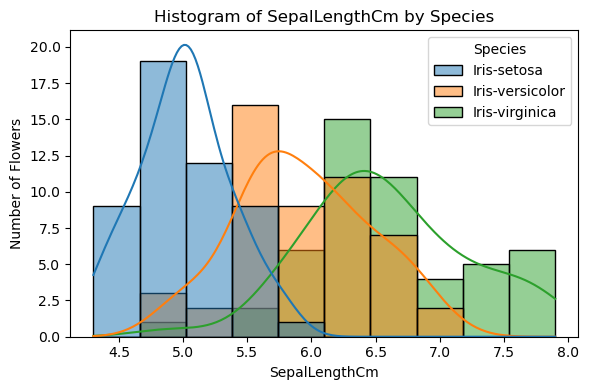

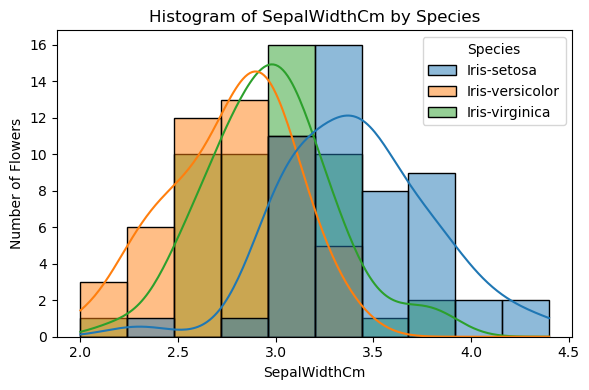

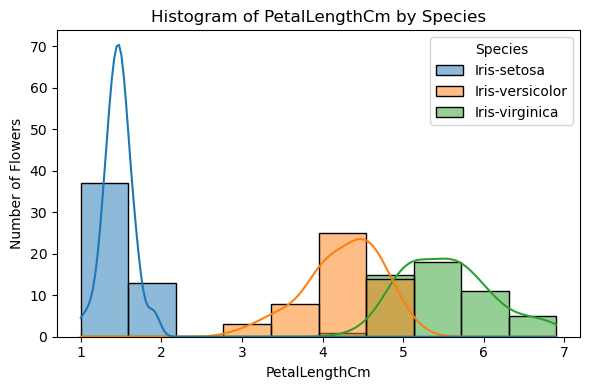

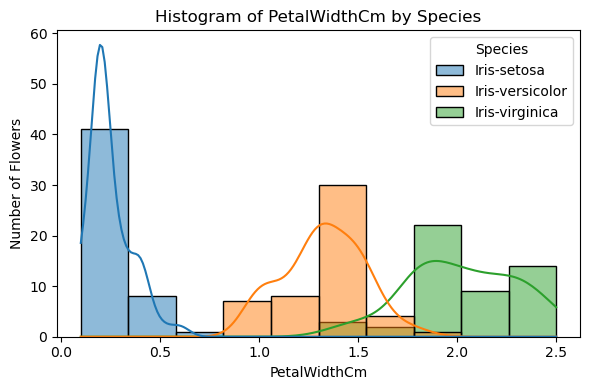

In [11]:
columns = iris_no_id.columns.values[:-1]

for column_name in columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(
        data=iris_no_id,
        x=column_name,
        hue="Species",        # kolor wg klasy
        bins=10,              # liczba słupków
        kde=True,             # czy pokazać krzywą gęstości
        multiple="layer",     # 'stack', 'dodge', 'layer', 'fill'
        edgecolor="black"     # kontury słupków
    )
    plt.title(f'Histogram of {column_name} by Species')
    plt.xlabel(column_name)
    plt.ylabel("Number of Flowers")
    plt.tight_layout()
    plt.show()

- Stetosa species tends to have clearly distinct feature distributions compared to the other two species, especially in petal length and petal width.  
- Versicolor and Virginica have simillar distribution in sepal length and sepal width.  
- The sepal width distribution varies less across species and may not contribute strongly to classification.

### Density Distribution

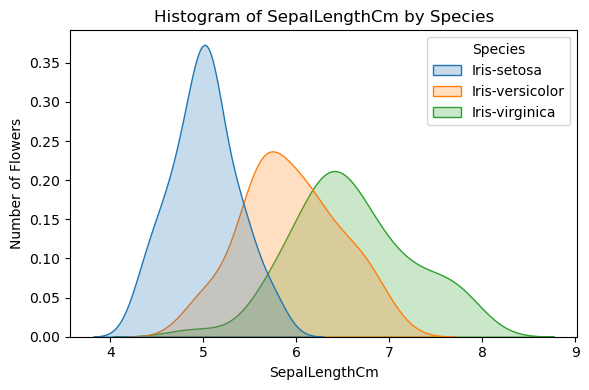

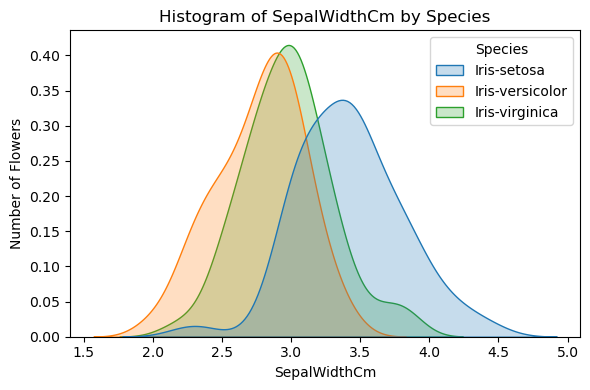

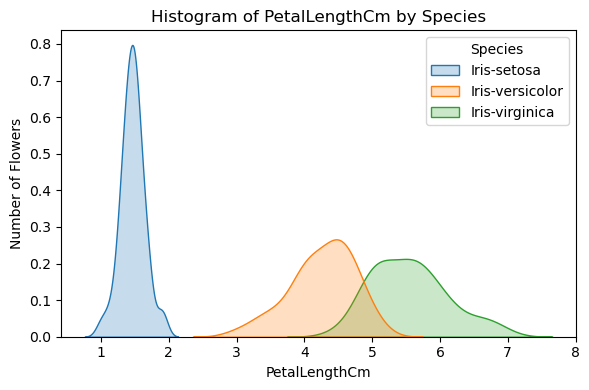

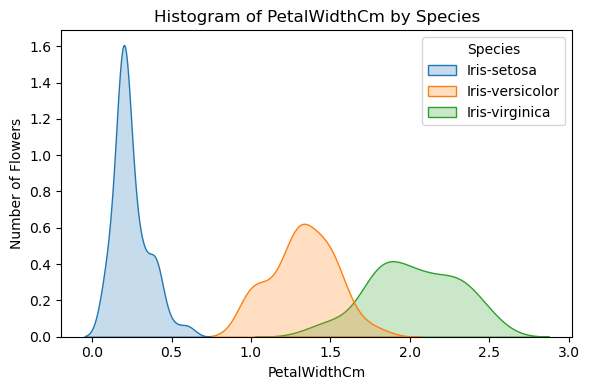

In [12]:
columns = iris_no_id.columns.values[:-1]

for column_name in columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(
        data=iris_no_id,
        x=column_name,
        hue="Species",        # kolor wg klasy
        fill=True
    )
    plt.title(f'Histogram of {column_name} by Species')
    plt.xlabel(column_name)
    plt.ylabel("Number of Flowers")
    plt.tight_layout()
    plt.show()

### Pairwise Relationships

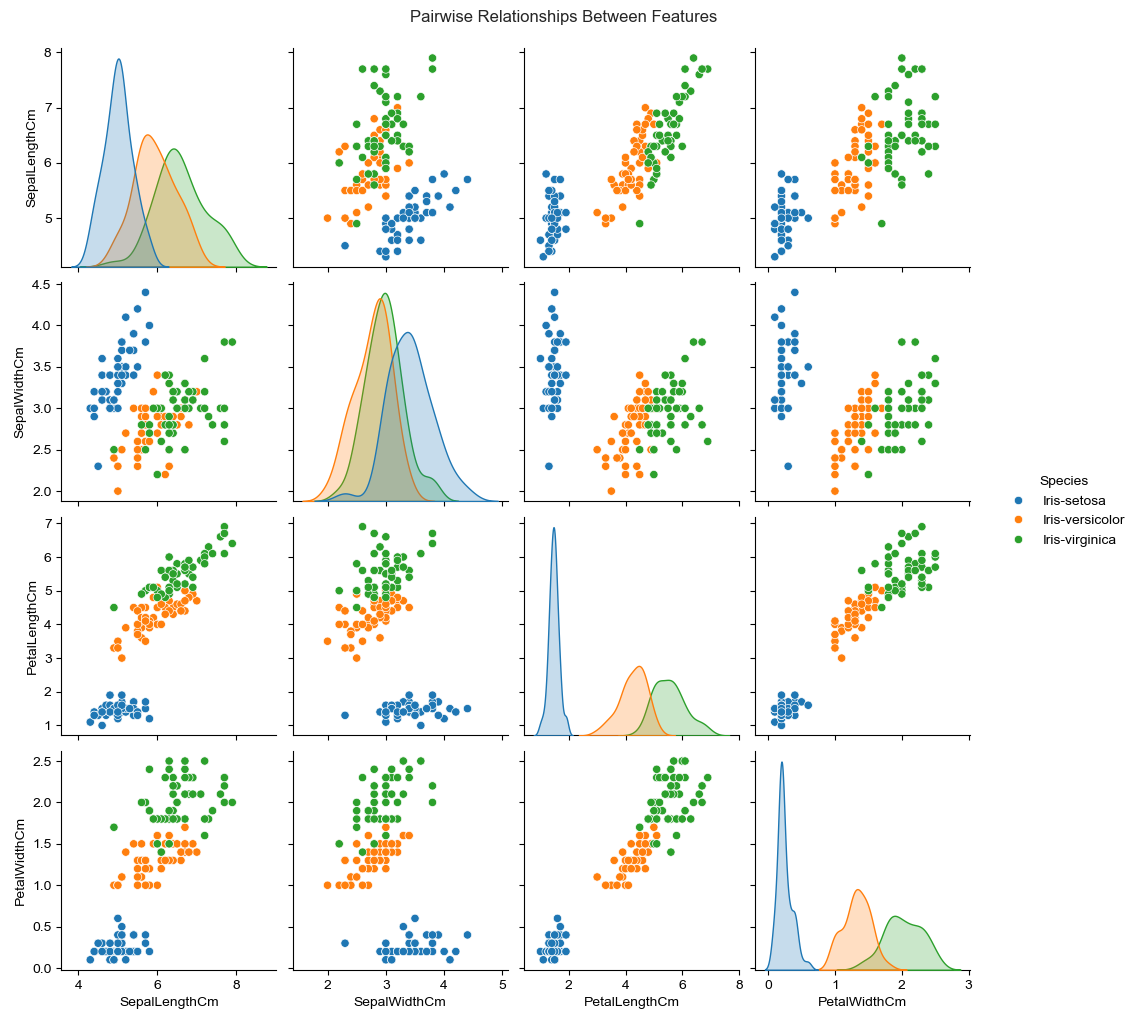

In [13]:
sns.pairplot(iris_no_id, hue='Species')
sns.set_style('whitegrid')
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

- Petal length and petal width clearly separate iris species and are strongly correlated with the species.
- Sepal width is less informative because the average values across species are similar and distributions overlap. Despite this, sepal width still helps distinguish species when combined with petal length and petal width.
With a small number of features (4), dimensionality reduction like PCA is not necessary yet but could be considered with larger datasets.

### Heatmap

A heatmap helps us visualize correlations, linear relationships — between features. It’s especially useful when deciding whether dimensionality reduction (like removing or combining features) might improve the model.

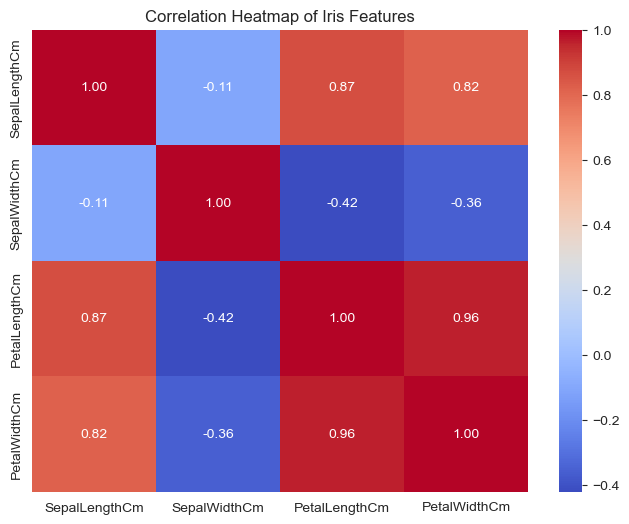

In [14]:
corr = iris_no_id.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Iris Features")
plt.show()

### Boxplot

Using Seaborn's boxplot() function, we can easily compare the spread of feature values across different categories, such as flower species.
The box represents the interquartile range (IQR), the line inside shows the median, and the "whiskers" extend to the typical range of the data. Points outside the whiskers are considered outliers.

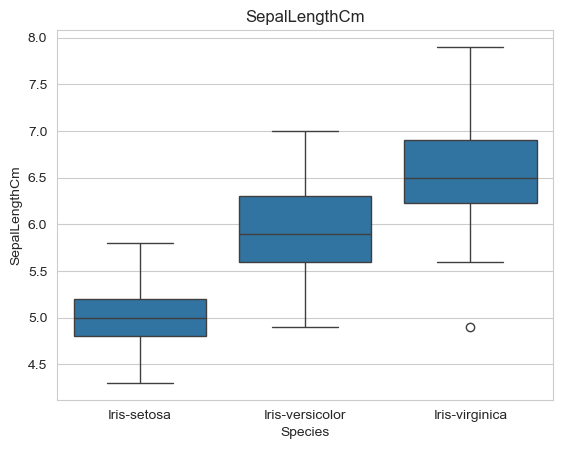

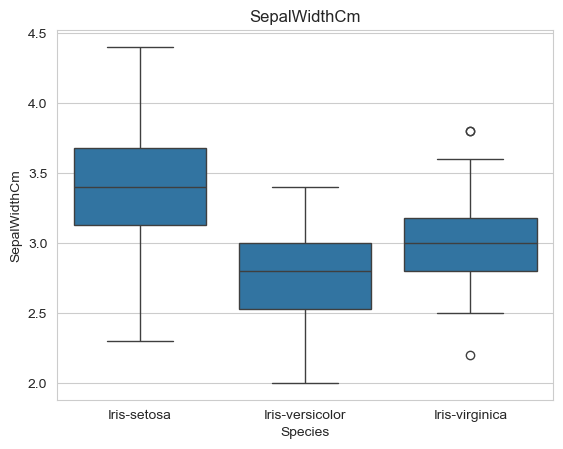

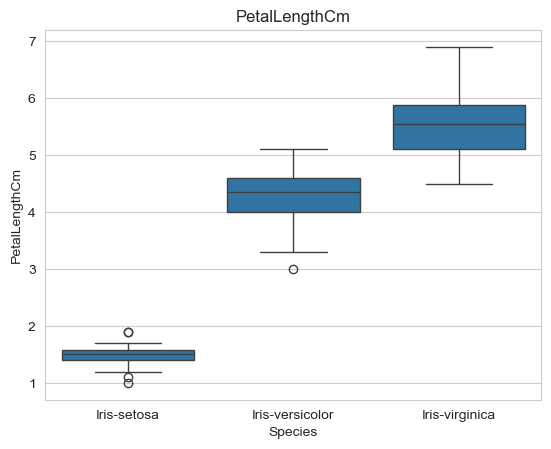

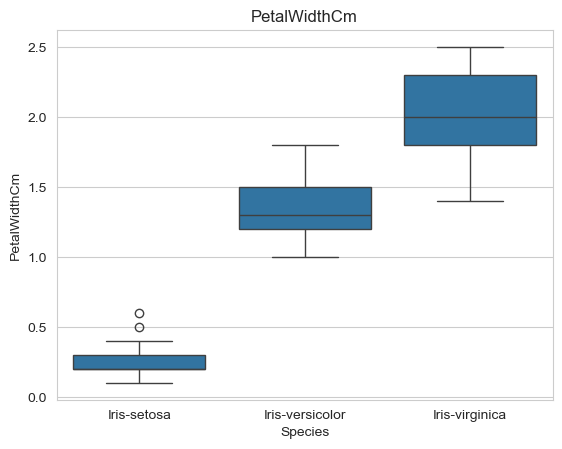

In [15]:
for column_name in iris_no_id.columns.values[:-1]: 
    sns.boxplot(x='Species', y=column_name, data=iris_no_id)
    plt.title(column_name)
    plt.show()

### Violinplot

Violinplot is like a combination of a boxplot and a density plot. The shape shows both the distribution (density) of feature values and summary statistics like the median and quartiles.

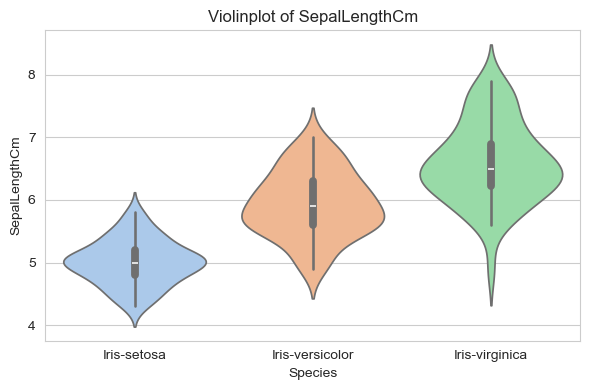

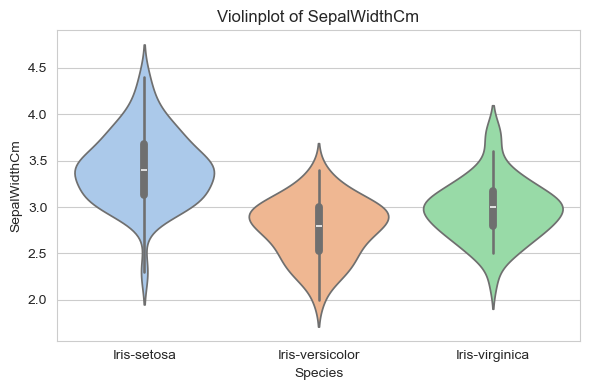

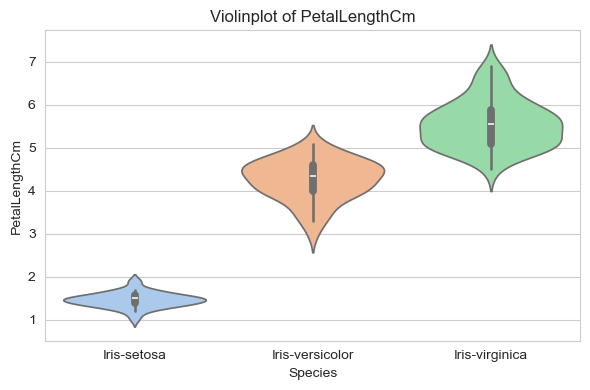

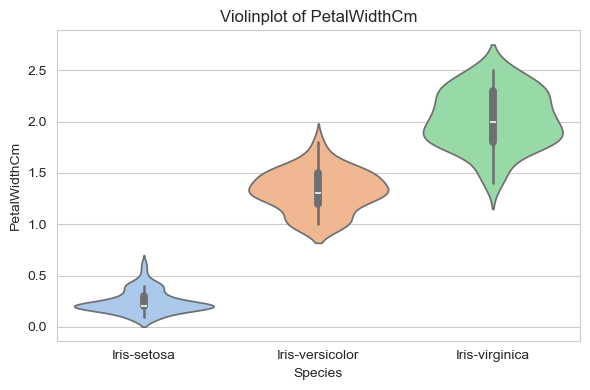

In [16]:
for column_name in iris_no_id.columns.values[:-1]:
    plt.figure(figsize=(6,4))
    sns.violinplot(data=iris_no_id, x='Species', y=column_name, hue='Species', inner='box', palette='pastel', legend=False)
    plt.title(f'Violinplot of {column_name}')
    plt.xlabel('Species')
    plt.ylabel(column_name)
    plt.tight_layout()
    plt.show()

## Can the four features be used to visually interpret and distinguish the flower species?

Yes, because analyzing the EDA plots, we can see that:

- **Petal length** and **petal width** show clear separation between species, especially for Iris Setosa.
- **Sepal width** also helps to distinguish the species, but to a lesser extent.
- **Sepal length** appears to be the least useful. I could consider removing this feature, but I want to see how the machine learning model handles it first. Removing it is not strictly necessary at this stage — I prefer to evaluate the model's performance with all features before making that decision.

# Train Test Split
Spliting the data into the training and testing data.

In [17]:
from sklearn.model_selection import train_test_split

# Splitting the data into independent (features) and dependent (target) variables
X = iris_no_id.drop(columns=['Species'])
y = iris_no_id['Species']

# Splitting into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocesing

## One-Hot Encoding

To prepare our categorical target variable (`species`) for machine learning algorithms, we apply **One-Hot Encoding**.  
This method creates a separate binary column for each class, where:

- `1` indicates presence of that class,
- `0` indicates absence.

In [18]:
encoder = OneHotEncoder(sparse_output=False)
species_encoded = encoder.fit_transform(iris_no_id[["Species"]])
encoded_column_names = encoder.get_feature_names_out(["Species"])
encoded_label_tab = pd.DataFrame(data=species_encoded,columns=encoded_column_names)
iris_with_encoded_label = pd.concat([iris_no_id, encoded_label_tab], axis = 1) # axis = 1 - along the rows, add columns
iris_encoded = iris_with_encoded_label.drop(columns=["Species"])
print(iris_encoded.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0            5.1           3.5            1.4           0.2   
1            4.9           3.0            1.4           0.2   
2            4.7           3.2            1.3           0.2   
3            4.6           3.1            1.5           0.2   
4            5.0           3.6            1.4           0.2   

   Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica  
0                  1.0                      0.0                     0.0  
1                  1.0                      0.0                     0.0  
2                  1.0                      0.0                     0.0  
3                  1.0                      0.0                     0.0  
4                  1.0                      0.0                     0.0  


## Feature Engineering

### Standarization
Standardizing the feature values so that they all have the same scale. This helps many machine learning models perform better (e.g., SVM, KNN)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Models

In [20]:
model_results = {} # dictionary to store model names and their evaluation scores

## Logistic Regression

In [21]:
# Train logistic regression model on standardized training data
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict on standardized test data
y_pred_logreg = logreg.predict(X_test_scaled)

accuracy_logreg = metrics.accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg, average='macro')

# Evaluate model accuracy
print(f'The accuracy of the Logistic Regression is:, {accuracy_logreg:.4f}')

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg) 
labels = logreg.classes_  # Get the unique class labels learned by the model during training -> _ (podkreślnik)
print('Confusion Matrix:')
print(pd.DataFrame(cm, index=labels,columns=labels))

# Detailed performance report
print('\nClassification Report:')
print(classification_report(y_test, y_pred_logreg))

# Save result
model_results['Logistic Regression'] = {
    'accuracy': accuracy_logreg,
    'f1_score': f1_logreg
}

The accuracy of the Logistic Regression is:, 0.9333
Confusion Matrix:
                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               10                0               0
Iris-versicolor            0                9               1
Iris-virginica             0                1               9

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



## kNN (K-Nearest Neighbors)  
I decided to use the cross-validation method to choose the best value of k.

Average CV accuracy for k=1: 0.9417
Average CV accuracy for k=2: 0.9583
Average CV accuracy for k=3: 0.9583
Average CV accuracy for k=4: 0.9583
Average CV accuracy for k=5: 0.9667
Average CV accuracy for k=6: 0.9667
Average CV accuracy for k=7: 0.9583
Average CV accuracy for k=8: 0.9583
Average CV accuracy for k=9: 0.9583
Average CV accuracy for k=10: 0.9667


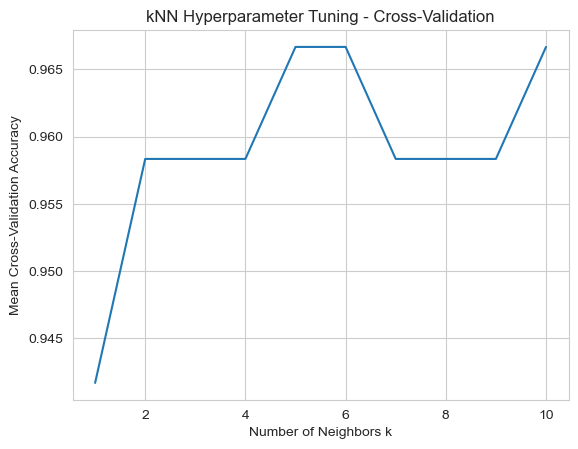

Best k according to cross-validation: 5 with accuracy: 0.9667
Test Accuracy of the best KNN for k = 5: 0.9333


In [22]:
# Cross-validation

cv_scores = []
k_values = range(1,11)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f'Average CV accuracy for k={k}: {scores.mean():.4f}')

plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('kNN Hyperparameter Tuning - Cross-Validation')
plt.show()

best_k = k_values[np.argmax(cv_scores)] # np.argmax -> index of the max value in the list
accuracy_knn = max(cv_scores)
print(f'Best k according to cross-validation: {best_k} with accuracy: {accuracy_knn:.4f}')

# Evaluate the best model on test data
best_knn = KNeighborsClassifier(n_neighbors=best_k)

best_knn.fit(X_train_scaled, y_train)
y_pred_knn = best_knn.predict(X_test_scaled)
accuracy_knn = best_knn.score(X_test_scaled, y_test)
f1_knn = f1_score(y_test, y_pred_knn, average = 'macro')
print(f'Test Accuracy of the best KNN for k = {best_k}: {accuracy_knn:.4f}')

# Save result
model_results['K-Nearest Neighbors'] = {
    'accuracy': accuracy_knn,
    'f1_score': f1_knn
}

## Decision Tree

The accuracy od Decison Tree classifier is: 0.9000


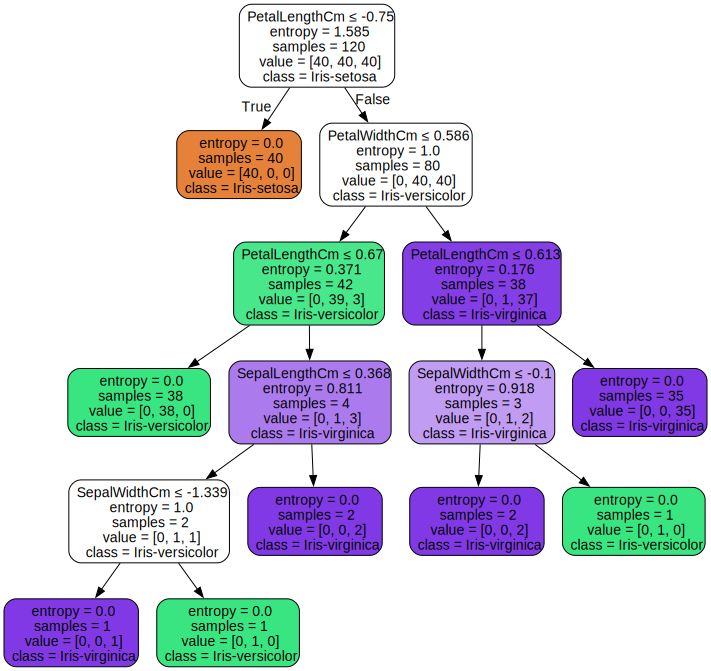

In [23]:
dtree = DecisionTreeClassifier(criterion='entropy', random_state=42) # information gain -> entropy
dtree.fit(X_train_scaled, y_train)
y_pred_dtree = dtree.predict(X_test_scaled)

accuracy_dtree = metrics.accuracy_score(y_test, y_pred_dtree)
print(f'The accuracy od Decison Tree classifier is: {accuracy_dtree:.4f}')

dot_data = export_graphviz(
    dtree,
    out_file=None,
    feature_names=X.columns,
    class_names=dtree.classes_,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph

- **Entropy = 0** → all samples belong to one class (pure node)  
- **Higher entropy** → more mixed or uncertain class distribution  

Decission Tree classifier reach an accuracy of 90% which is lower than kNN and Logistic Regression.  
The main advantage of Decision Trees is that they are easy to understand and interpret. The model shows how decisions are made based on feature values, which makes it useful for visual inspection and explanation.

### Fine-tuning Decision Tree Model via Grid Search
Grid search is a hyperparameter optimization technique, which can further help to improve the perfomance of a model by finding the optimal combination of hyperparameter values. I will try different values for max_depth and min_samples_split to find the best settings for the Decision Tree.  
- **max_depth** - the maximum depth of the tree. Limits how deep the tree can grow;
- **min_samles_split** - the minimum number of samples required to split an internal node;
- **min_samle_leaf** - the minimum number of samples required to be at a leaf node;
- **criterion** - the function used to measure the quality - information gain.

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid_dtree = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_dtree = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dtree,
    cv=5, # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

grid_search_dtree.fit(X_train_scaled, y_train)

# Display the best combination of parameters and the corresponding score
print("Best Parameters:", grid_search_dtree.best_params_)
print("Best Cross-Validated Accuracy:", grid_search_dtree.best_score_)

# Evaluate the best model on test data
best_dtree = grid_search_dtree.best_estimator_
y_pred_dtree = best_dtree.predict(X_test_scaled)
test_accuracy_dtree = best_dtree.score(X_test_scaled, y_test) # model.score(X, y) -> accuracy_score(y, model.predict(X))
test_f1_dtree = f1_score(y_test, y_pred_dtree, average='macro')
print(f"Test Accuracy of the Best Decision Tree: {test_accuracy_dtree:.4f}")

# Save result
model_results['Decision Tree'] = {
    'accuracy': test_accuracy_dtree,
    'f1_score': test_f1_dtree
}

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validated Accuracy: 0.9416666666666668
Test Accuracy of the Best Decision Tree: 0.9000


The model achieved better accuracy with tuned params, but slightly wore on a test, propaply because of overfitting, which is common for decision trees.
Decision tree boundaries are always rectangular because they split data by simple rules on one feature at a time, which can sometimes make the model less flexible. In contrast, **random forest** combine many trees to create more complex boundaries - **ensemble learning**.

## Random Forest

Random Forest is a Voting Classifier (Hard Voting Classifier) that builds multiple decision tree and combines their results to improve accuracy and reduce overfitting.  
I will train a random forest models using Grid Search to tune hyperparameters for better accuracy.

In [25]:
param_grid_rforest = {
    'n_estimators': [50, 100, 200], # numbers of trees in the forest
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rforest = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42), 
    param_grid=param_grid_rforest, 
    scoring='accuracy', 
    n_jobs=-1, 
    cv=5, 
)

grid_search_rforest.fit(X_train_scaled, y_train)

print(f'Best Parameters: {grid_search_rforest.best_params_}')
print(f'Best Cross-Validation Accuracy: {grid_search_rforest.best_score_}')

best_rforest = grid_search_rforest.best_estimator_
y_pred_rforest = best_rforest.predict(X_test_scaled)
test_accuracy_rforest = best_rforest.score(X_test_scaled, y_test)
test_f1_rforest = f1_score(y_test, y_pred_rforest, average='macro')
print(f'The Accuracy of the Best Random Forest: {test_accuracy_rforest:.4f}')

# Save result
model_results['Random Forest'] = {
    'accuracy': test_accuracy_rforest,
    'f1_score': test_f1_rforest
}

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.9666666666666666
The Accuracy of the Best Random Forest: 0.9667


# Model comparison & selection

{'Logistic Regression': {'accuracy': 0.9333333333333333, 'f1_score': 0.9333333333333332}, 'K-Nearest Neighbors': {'accuracy': 0.9333333333333333, 'f1_score': 0.9326599326599326}, 'Decision Tree': {'accuracy': 0.9, 'f1_score': 0.899749373433584}, 'Random Forest': {'accuracy': 0.9666666666666667, 'f1_score': 0.9665831244778612}}
                     accuracy  f1_score
Logistic Regression    0.9333    0.9333
K-Nearest Neighbors    0.9333    0.9327
Decision Tree          0.9000    0.8997
Random Forest          0.9667    0.9666


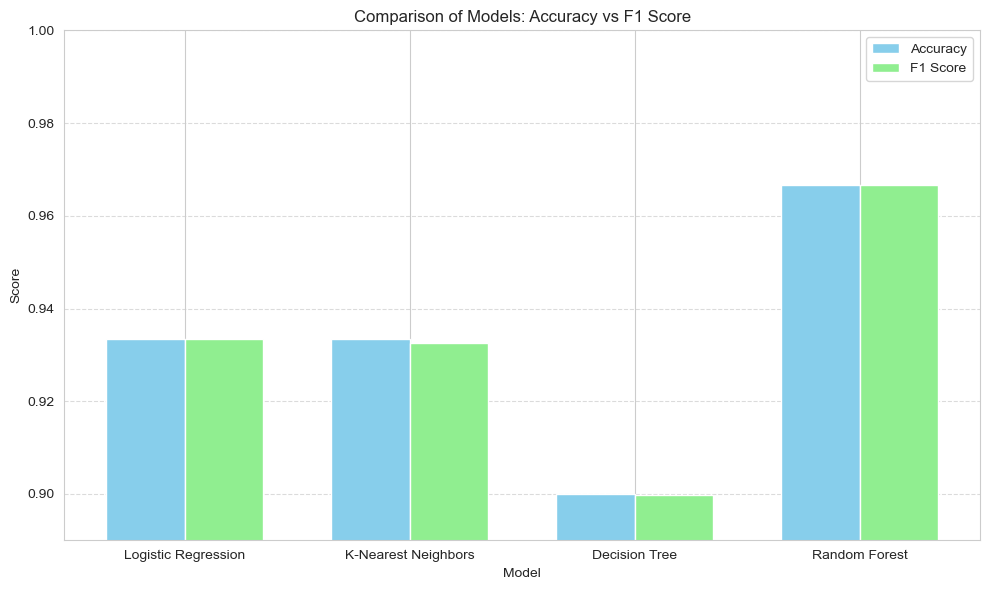

In [26]:
print(model_results)
results_df = pd.DataFrame(model_results).T
results_df = results_df.round(4)
print(results_df)


model_names = list(model_results.keys())
accuracies = [model_results[model]['accuracy'] for model in model_names]
f1_scores = [model_results[model]['f1_score'] for model in model_names]

x = range(len(model_names))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, accuracies, width=width, label='Accuracy', color='skyblue')
plt.bar([i + width for i in x], f1_scores, width=width, label='F1 Score', color='lightgreen')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Models: Accuracy vs F1 Score')
plt.xticks([i + width / 2 for i in x], model_names)
plt.ylim(0.89, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# Conclusions

- The Iris dataset is well-suited for classification using multiple classic machine learning models. It was clean and well-prepared, requiring minimal preprocessing before applying models.
- The Seaborn library proved very useful for visualizing the distribution of the data. It is intuitive and user-friendly, eliminating the need for complex code.
- Allevaluated models achieved similar values for both accuracy and F1-socre. The differences between them were relatively small.
- Random Forest achieved the highest sccuracu (98,67%) and  F1-score (96,66%). This suggest it is the most relible model for this classification task.
- Logistic Regression and K-Nearest Neighbors delivered identical accuracy and almost identical F1-score. These models are simple and interpretable, so if we want to clearly understand how to model makes decisions they will be a good choice.
- The Decision Tree had the weakest results, but still performed quite well with around 90% accuracy and F1-score.